# K Nearest Neighbors Regression on CarDekho Dataset
<ol>
<li> Instance Based Algorithm (Lazy Learner).</li>
<li> Supervised Learning Algorithms which works for both Classification and Regression. </li>
<li> It works based on Mode of KNN for Classification and Mean/Median for Regression.</li>
<li> It works for both Categorical and Numerical Independet Features. </li>
</ol>

<b> Algorithm: </b>
<ol>
<li> Find Distance of each xtest point to xtrain points. </li>
<li> Choose K nearest neigbours of xtest </li>
<li> Classification -> mode(y1,y2....yk) --> yhat, 
<br> Regression -> mean(y1,y2,..yk) ---> yhat </li>
<li> Check Performance metrics </li>
</ol>

<b>Note: </b>
<ul>
<li> k is the hyperparameter can be choosen using cross validation. </li>
<li> Higher the k more the chance for underfitting </li>
<li> Lower the k value more is the chance for overfitting. </li>
<li> There is impact of outliers depending upon k value </li>
<li> Greaty affected by class imbalance. </li>

</ul>

<b> Basic Preprocessing Steps: </b>
<ul>
<li> As KNN works based on Distace so it is better to standardize or normalize before model building. </li>
<li> Handling Outliers. </li>
<li> Handling Imbalanced Datasets by upsampling and downsampling. </li>
</ul>


In [3]:
#Importing necessary Libraries
import pandas as pd
import numpy as np
import math as m
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [158]:
class KNN_Regressor:
  def __init__(self,k,x,y,dist="Euclidean",technique="Mean"):
    '''
     Constructor Function to initiaze class memebers.
     args:
     k: Hyperparameter
     x: x
     y: Y Column
     dist: Euclidean/Manhattan/Hamming/Minkowski
     Technique: Mean/Median
     return: None
    '''

    self.K = k
    self.x = x
    self.y = y
    self.dist = dist
    self.technique = technique
  
  def euclidean(self,x1,x2):
    '''
    Function to calculate eucliedean distance between given 2 points x1 x2
    args:
    x1: list of coordinates of point 1
    x2: list of coordincates of point 2
    return: distance between point1 and point2 float
    '''
    dist = 0 
    for i in range(len(x1)):
      dist += (x1[i]-x2[i])**2
    return dist**0.5

  def mean(self,arr):
    '''
    Function to calculate mean of given array
    args:
    arr: list
    return: float
    '''
    sm = 0
    for i in arr:
      sm+=float(i)

    return sm/len(arr)

  def median(self,arr):
    '''
    Function to calculate mean of given array
    args:
    arr: list
    return: float
    '''
    #sorting array
    arr.sort()
    if len(arr)%2==0:
      return (float(arr[int(len(arr)/2)-1])+float(arr[int(len(arr)/2)]))/2
    else:
      return float(arr[int(len(arr)/2)-1])

  def Predict(self,x_test):
    '''
    Function to predict for given x test
    args:
    xtest: dataframe containing indpendent features
    return: List of all the yhats of given xtest
    '''
    xtrain = np.array(self.x)
    ytrain = np.array(self.y)
    xtest = np.array(x_test)
    yhat_test = []
    

    for i in range(len(xtest)):
      dic = {}
      for j in range(len(xtrain)):
        if self.dist == "Euclidean":
          dic[str(i)+"_"+str(j)+"_"+str(ytrain[j])] = self.euclidean(xtest[i],xtrain[j])
        else:
          return
      dic = dict(sorted(dic.items(), key=lambda item: item[1]))
      yknn = list(dic.keys())[:self.K]
      yhat = []
      for i in yknn:
        yhat.append(i.split("_")[-1])
      if self.technique=="Mean":
        yhat_test.append(self.mean(yhat))
      else:
        yhat_test.append(self.median(yhat))
    
    return yhat_test
  
  def MSE(self,y,yhat):
    '''
    Function to calculate Mean Squared Error
    args:
    y: Actual Y 
    yhat: Predicted Y
    return: float'''
    sse = 0
    for i in range(len(y)):
      sse+= (y[i]-yhat[i])**2
    
    return sse/len(y)

## EDA

In [41]:
df = pd.read_csv("https://raw.githubusercontent.com/Lordvarun23/KNN-Regressor-Cardekho/main/data.csv")

In [5]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


### Inference:
<ol>
<li>
Columns Name,Year,Km_driven,Fuel,Seller type, transmission,owner are independent features.</li>
<li> selling_price column is dependent feature. </li>
</ol>


In [6]:
df.shape

(4340, 8)

In [7]:
df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


<h3> Data Visualization </h3>

<h4> Checking no of Cars in each fuel type <h4>

Text(0, 0.5, 'No of Cars')

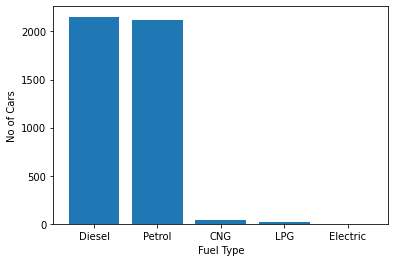

In [34]:
dic_fuel = dict(df["fuel"].value_counts())
plt.bar(dic_fuel.keys(),dic_fuel.values())
plt.xlabel("Fuel Type")
plt.ylabel("No of Cars")

<h4> Inference:</h4> The majority of the cars are either Diesel or Petrol.
<h3> Fuel Type vs Mean Selling Price </h3>

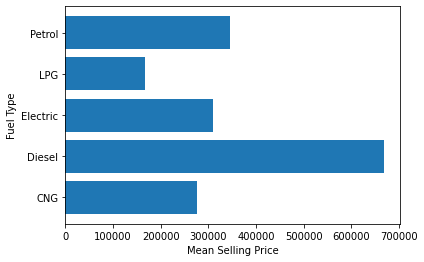

In [27]:
grpby_fuel = df.groupby(by=["fuel"]).mean()
grpby_fuel = grpby_fuel.drop(columns=["year","km_driven"])
plt.barh(grpby_fuel.index,grpby_fuel["selling_price"])
plt.ylabel("Fuel Type")
plt.xlabel("Mean Selling Price")
plt.show()

<h4> Inference:</h4> Diesel Cars are sold at higher prices than other fuel type cars.
<h3> Ownership vs Mean Selling Price </h3>

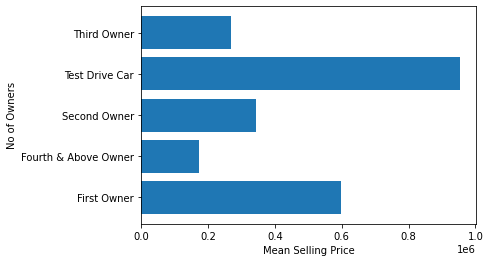

In [28]:
grpby_owner = df.groupby(by=["owner"]).mean()
grpby_owner = grpby_owner.drop(columns=["year","km_driven"])
plt.barh(grpby_owner.index,grpby_owner["selling_price"])
plt.ylabel("No of Owners")
plt.xlabel("Mean Selling Price")
plt.show()

<h4> Inference:</h4> Test Driven cars are sold at higher prices than other. This is Obvious because test driven cars are almost brand new.
<h3> Transmission Type vs Mean Selling Price </h3>

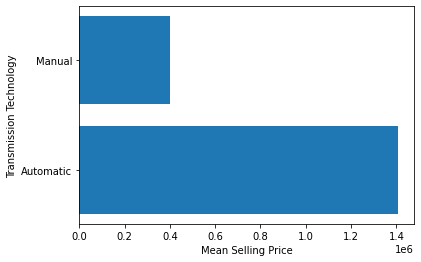

In [29]:
grpby_trans = df.groupby(by=["transmission"]).mean()
grpby_trans = grpby_trans.drop(columns=["year","km_driven"])
plt.barh(grpby_trans.index,grpby_trans["selling_price"])
plt.ylabel("Transmission Technology")
plt.xlabel("Mean Selling Price")
plt.show()

<h4> Inference:</h4> Automatic cars are sold at higher prices than other.
<h3> Seller Type vs Mean Selling Price </h3>

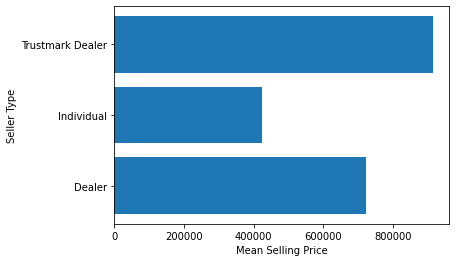

In [30]:
grpby_seller = df.groupby(by=["seller_type"]).mean()
grpby_seller = grpby_seller.drop(columns=["year","km_driven"])
plt.barh(grpby_seller.index,grpby_seller["selling_price"])
plt.ylabel("Seller Type")
plt.xlabel("Mean Selling Price")
plt.show()

<h4> Inference:</h4> Trusted Sellers sells at higher prices than Dealer and Direct Purchases.
<h3> Pair Plot </h3>

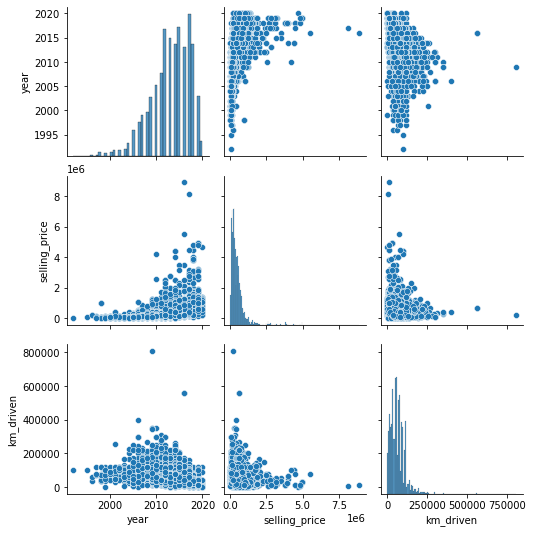

In [35]:
sns.pairplot(df)

<h3> Encoding Categorical Features using Label Encoding </h3>

In [42]:
df["fuel"].value_counts()

Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: fuel, dtype: int64

In [43]:
def fuel(x):
  if x=="Diesel":
    return 1
  elif x=="Petrol":
    return 2
  elif x=="CNG":
    return 3
  elif x=="LPG":
    return 4
  else:
    return 5

df["fuel"] = df["fuel"].apply(lambda x: fuel(x))

In [44]:
df["owner"].value_counts()

First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: owner, dtype: int64

In [45]:
def owner(x):
  if x=="First Owner":
    return 1
  elif x=="Second Owner":
    return 2
  elif x=="Third Owner":
    return 3
  elif x=="Fourth & Above Owner":
    return 4
  else:
    return 0
    
df["owner"] = df["owner"].apply(lambda x: owner(x))

In [47]:
df["transmission"] = df["transmission"].apply(lambda x : 0 if x=="Manual" else 1)

In [48]:
df["seller_type"].value_counts()

Individual          3244
Dealer               994
Trustmark Dealer     102
Name: seller_type, dtype: int64

In [49]:
def seller(x):
  if x=="Individual":
    return 1
  elif x=="Dealer":
    return 2
  else:
    return 3
    
df["seller_type"] = df["seller_type"].apply(lambda x: seller(x))

In [50]:
df.head(2)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,2,1,0,1
1,Maruti Wagon R LXI Minor,2007,135000,50000,2,1,0,1


<h4> Dropping Year and Name Columns from Dataset </h4>

In [51]:
df = df.drop(columns=["name","year"])

In [53]:
df.head(2)

,selling_price,km_driven,fuel,seller_type,transmission,owner
0,60000,70000,2,1,0,1
1,135000,50000,2,1,0,1


### Train Test Split

In [138]:
X = df.drop(columns=["selling_price"])
Y = df.selling_price
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.30)

In [139]:
x_train.shape

(3038, 5)

In [140]:
x_test.shape

(1302, 5)

### Peforming Normalization Standard Scaler as KNN is Distance based and we need to bring different scales to uniform

In [141]:
from sklearn.preprocessing import StandardScaler

In [142]:
ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.fit_transform(x_test)

In [143]:
y_test = np.array(y_test)

In [144]:
y_train = np.array(y_train)

## Model Building

<h3> Finding Optimal K value using Cross Validation [Mean]</h3>

In [145]:
cross_val_x = x_test[:100]
cross_val_y = y_test[:100]
x_test = x_test[100:]
y_test = y_test[100:]
x_train1 = x_train[:200]
y_train1 = y_train[:200]
k = [i for i in range(1,50)]
train_error = []
cross_val_error = []
for i in k:
  model = KNN_Regressor(i,x_train,y_train)
  ypred = model.Predict(x_train1)
  train_error.append(model.MSE(y_train1,ypred))
for i in k:
  model = KNN_Regressor(i,x_train,y_train)
  ypred = model.Predict(cross_val_x)
  cross_val_error.append(model.MSE(cross_val_y,ypred))


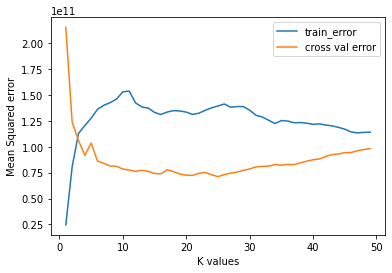

In [147]:
plt.plot(k,train_error,label="train_error")
plt.plot(k,cross_val_error,label="cross val error")
plt.xlabel("K values")
plt.ylabel("Mean Squared error")
plt.legend()

Let us choose k value as 22

In [148]:
model = KNN_Regressor(22,x_train,y_train)

In [149]:
ypred = model.Predict(x_test)

### Mean Squared Error for test dataset



In [150]:
print("Mean Squared Error:",model.MSE(y_test,ypred))

Mean Squared Error: 156531117970.11087


<h2> Using Median <h2>

In [159]:
model1 = KNN_Regressor(22,x_train,y_train,technique="Median")
ypred = model1.Predict(x_test)
print("Mean Squared Error:",model1.MSE(y_test,ypred))

Mean Squared Error: 242377049744.92493


## Sklearn Implementation of K Nearest Neighbors

In [151]:
from sklearn.neighbors import KNeighborsRegressor

In [152]:
neigh = KNeighborsRegressor(n_neighbors=22)

In [153]:
neigh.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=22)

In [154]:
y_pred_sklearn = neigh.predict(x_test)

In [156]:
sse = 0
for i in range(len(y_test)):
  sse+=(y_test[i]-y_pred_sklearn[i])**2
print("Mean Squared Error in sklearn is:",sse/len(y_test))

Mean Squared Error in sklearn is: 155755453861.10956
